Garment Worker Productivity Analysis PPT

https://drive.google.com/file/d/1Jsq-LKDmFC9yrA0LUyGQmNhtV6U3HZxm/view?usp=sharing

#GARMENT WORKER PERFORMANCE PREDICTION

#Importing the libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Loading dataset into a DataFrame

In [ ]:
df = pd.read_excel("/content/garments_worker_productivity.ML.xlsx")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
2,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382
4,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,2015-03-11,Quarter2,sweing,Wednesday,4,0.75,26.82,1054,7080,45,0.0,0,0,59.0,0.750051
687,2015-03-11,Quarter2,sweing,Wednesday,5,0.70,26.82,992,6960,30,0.0,0,1,58.0,0.700557
688,2015-03-11,Quarter2,sweing,Wednesday,8,0.70,30.48,914,6840,30,0.0,0,1,57.0,0.700505
689,2015-03-11,Quarter2,sweing,Wednesday,6,0.70,23.41,1128,4560,40,0.0,0,1,38.0,0.700246


In [ ]:
mean_value = df['wip'].mean()
df['wip'].fillna(mean_value, inplace=True)
print(df)
df.to_csv('updated_dataset.csv')

          date   quarter department        day  team  targeted_productivity  \
0   2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
1   2015-01-01  Quarter1     sweing   Thursday    11                   0.80   
2   2015-01-01  Quarter1     sweing   Thursday    12                   0.80   
3   2015-01-01  Quarter1     sweing   Thursday     6                   0.80   
4   2015-01-01  Quarter1     sweing   Thursday     7                   0.80   
..         ...       ...        ...        ...   ...                    ...   
686 2015-03-11  Quarter2     sweing  Wednesday     4                   0.75   
687 2015-03-11  Quarter2     sweing  Wednesday     5                   0.70   
688 2015-03-11  Quarter2     sweing  Wednesday     8                   0.70   
689 2015-03-11  Quarter2     sweing  Wednesday     6                   0.70   
690 2015-03-11  Quarter2     sweing  Wednesday     7                   0.65   

       smv   wip  over_time  incentive  idle_time  

In [ ]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
2,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382
4,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,2015-03-11,Quarter2,sweing,Wednesday,4,0.75,26.82,1054,7080,45,0.0,0,0,59.0,0.750051
687,2015-03-11,Quarter2,sweing,Wednesday,5,0.70,26.82,992,6960,30,0.0,0,1,58.0,0.700557
688,2015-03-11,Quarter2,sweing,Wednesday,8,0.70,30.48,914,6840,30,0.0,0,1,57.0,0.700505
689,2015-03-11,Quarter2,sweing,Wednesday,6,0.70,23.41,1128,4560,40,0.0,0,1,38.0,0.700246


#Data preprocessing

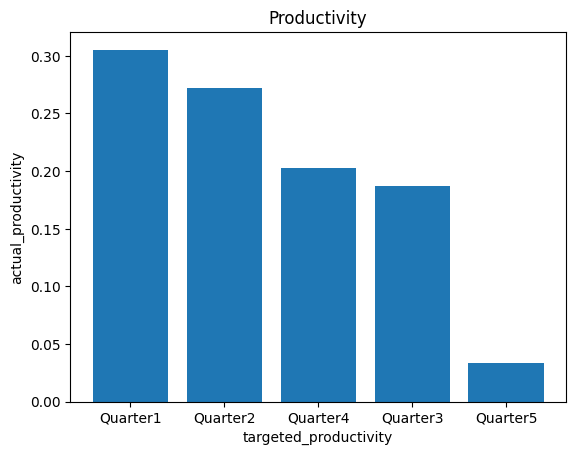

The data is imbalanced.
Imbalanced classes: Quarter5    0.033285
Name: quarter, dtype: float64


In [ ]:
class_counts = df['quarter'].value_counts()
total_instances = len(df)

# Calculate proportions
class_proportions = class_counts / total_instances
plt.bar(class_proportions.index, class_proportions.values)
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('Productivity')
plt.show()

# Check if the data is imbalanced based on a threshold (e.g., 10%)
threshold = 0.1
imbalanced_classes = class_proportions[class_proportions < threshold]

if imbalanced_classes.empty:
    print("The data is balanced.")
else:
    print("The data is imbalanced.")
    print("Imbalanced classes:", imbalanced_classes)



In [ ]:
value_to_remove = 'Quarter5'
column_name = 'quarter'
df = df[df['quarter'] != 'Quarter5']

# Save the updated dataset
df.to_csv('updated_dataset.csv')

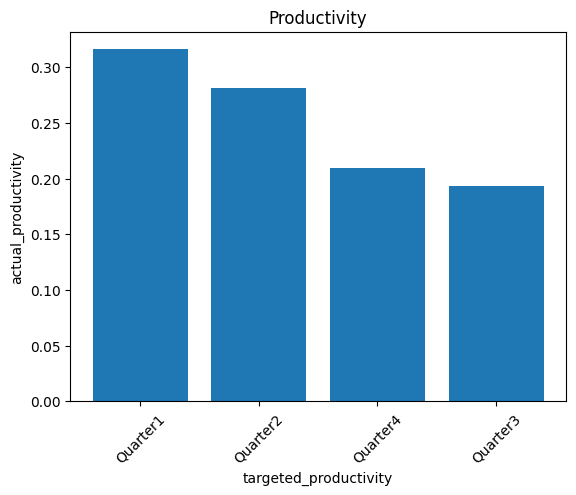

The data is balanced.


In [ ]:
class_counts = df['quarter'].value_counts()
total_instances = len(df)

# Calculate proportions
class_proportions = class_counts / total_instances
plt.bar(class_proportions.index, class_proportions.values)
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('Productivity')
plt.xticks(rotation=45)
plt.show()

# Check if the data is imbalanced based on a threshold (e.g., 10%)
threshold = 0.1
imbalanced_classes = class_proportions[class_proportions < threshold]

if imbalanced_classes.empty:
    print("The data is balanced.")
else:
    print("The data is imbalanced.")
    print("Imbalanced classes:", imbalanced_classes)


In [ ]:
df.drop(columns=["date"],inplace=True)
df = df[df != 'date']
df.to_csv('updated_dataset.csv')
df

<ipython-input-65-8141e9cb9cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["date"],inplace=True)


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
2,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382
4,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Quarter2,sweing,Wednesday,4,0.75,26.82,1054,7080,45,0.0,0,0,59.0,0.750051
687,Quarter2,sweing,Wednesday,5,0.70,26.82,992,6960,30,0.0,0,1,58.0,0.700557
688,Quarter2,sweing,Wednesday,8,0.70,30.48,914,6840,30,0.0,0,1,57.0,0.700505
689,Quarter2,sweing,Wednesday,6,0.70,23.41,1128,4560,40,0.0,0,1,38.0,0.700246


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 690
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                668 non-null    object 
 1   department             668 non-null    object 
 2   day                    668 non-null    object 
 3   team                   668 non-null    int64  
 4   targeted_productivity  668 non-null    float64
 5   smv                    668 non-null    float64
 6   wip                    668 non-null    int64  
 7   over_time              668 non-null    int64  
 8   incentive              668 non-null    int64  
 9   idle_time              668 non-null    float64
 10  idle_men               668 non-null    int64  
 11  no_of_style_change     668 non-null    int64  
 12  no_of_workers          668 non-null    float64
 13  actual_productivity    668 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 78.3+ KB


In [ ]:
df['department'].unique()

array(['sweing'], dtype=object)

#Exploratory Data Analysis

1. What is the size of the dataset

In [ ]:
df.shape

(668, 14)

2. list out all the columns in the dataset.

In [ ]:
# Display the column names
column_names = df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


3. Are there any missing values in the dataset, and how are they distributed?

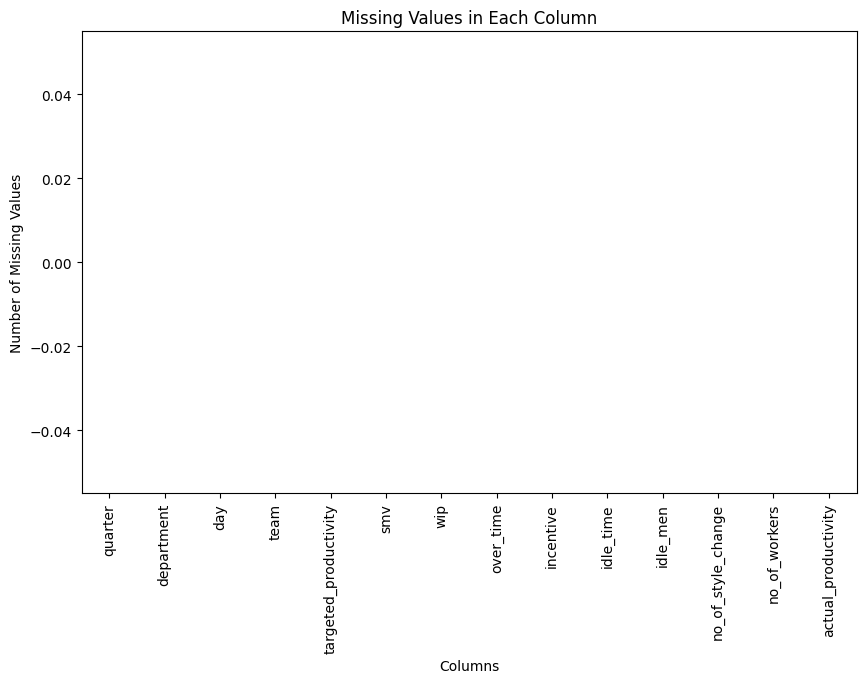

In [ ]:
missing_values = df.isnull()
missing_count = missing_values.sum()
plt.figure(figsize=(10, 6))
missing_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

4. What are the pairwise correlations between numerical variables?

In [ ]:
numerical_variables = ['smv', 'no_of_workers', 'actual_productivity']

# Calculate the correlation matrix
correlation_matrix = df[numerical_variables].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          smv  no_of_workers  actual_productivity
smv                  1.000000       0.580455            -0.162124
no_of_workers        0.580455       1.000000            -0.011386
actual_productivity -0.162124      -0.011386             1.000000


5. Can you visualize these correlations using a correlation matrix or a heatmap?

<ipython-input-72-cb26e8c778aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

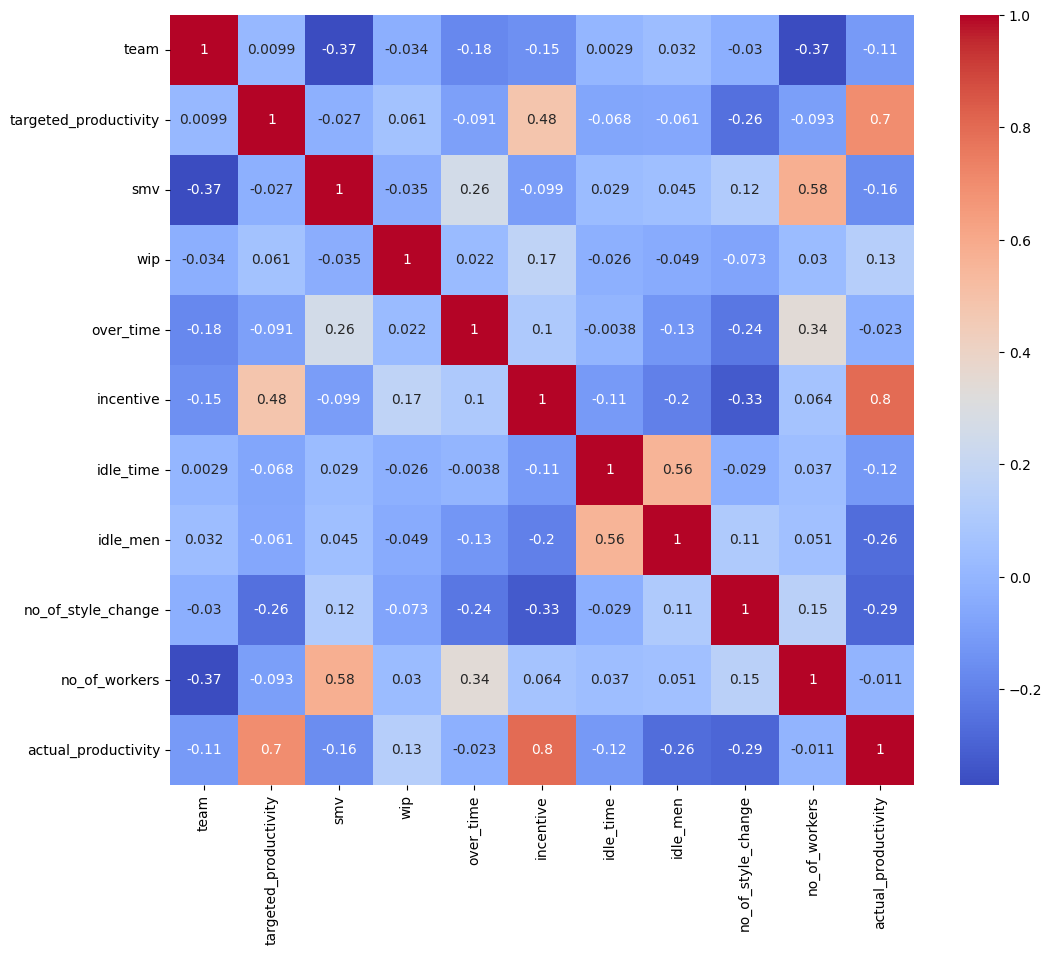

In [ ]:
corr = df.corr()
corr
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cbar=True,cmap='coolwarm')

6. number of empty values in the column

In [ ]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

7. Number of duplicated values in a column

In [ ]:
df.duplicated().sum()

0

8. plot a graph of actual productivity

Text(0.5, 1.0, 'GARMENT WORKER PERFORMANCE PREDICTION')

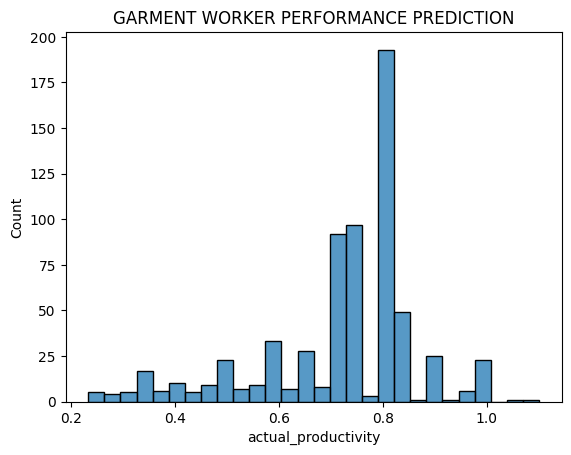

In [ ]:
ax = sns.histplot(df['actual_productivity'])
ax.set_title('GARMENT WORKER PERFORMANCE PREDICTION')

9. Scatter Plot of targeted productivity vs. actual Productivity

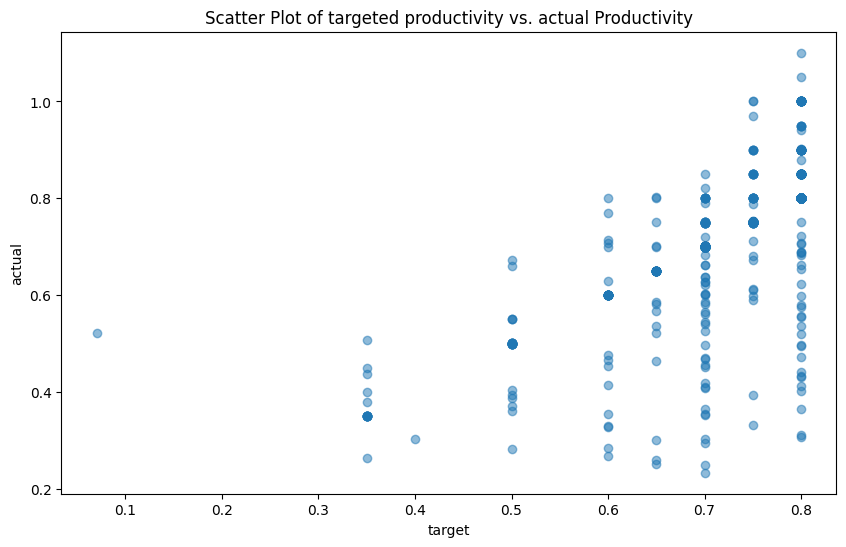

In [ ]:
x_column = 'targeted_productivity'
y_column = 'actual_productivity'

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(df[x_column], df[y_column], alpha=0.5)  # alpha controls point transparency
plt.title('Scatter Plot of targeted productivity vs. actual Productivity')
plt.xlabel('target')
plt.ylabel('actual')

plt.show()






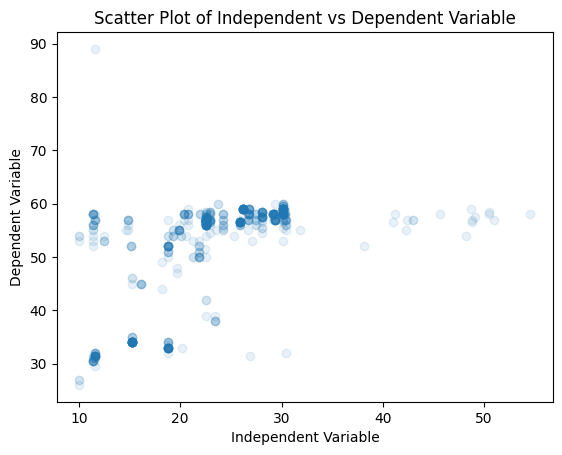

In [ ]:
x_column = 'smv'
y_column = 'no_of_workers'
plt.scatter(df[x_column], df[y_column], alpha=0.1)  # Set alpha for transparency
plt.title('Scatter Plot of Independent vs Dependent Variable')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

10.Workers in each quarter

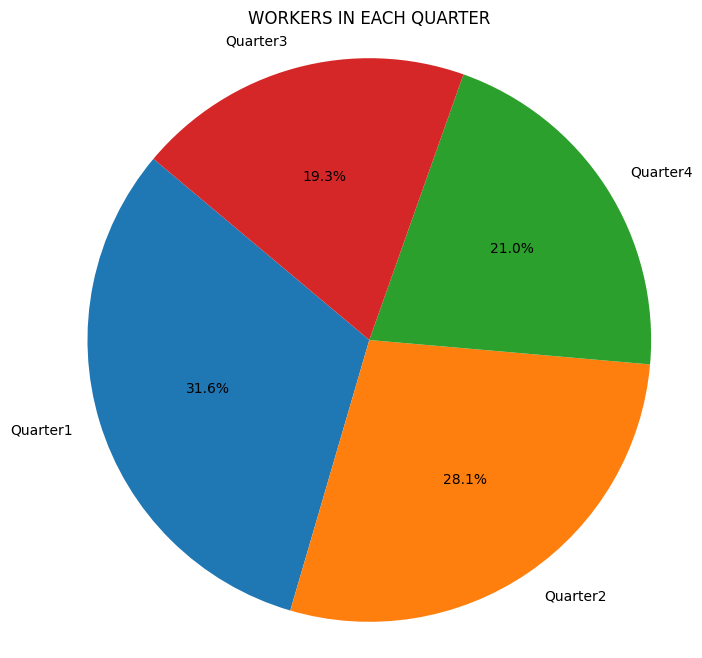

In [ ]:
# Specify the column for which you want to create the pie chart
category_column = 'quarter'

# Calculate the frequency of each category
category_counts = df[category_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('WORKERS IN EACH QUARTER')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
x= pd.get_dummies(df, drop_first=True)
print(x)

     team  targeted_productivity    smv   wip  over_time  incentive  \
0       8                   0.80  26.16  1108       7080         98   
1      11                   0.80  11.41   968       3660         50   
2      12                   0.80  11.41   968       3660         50   
3       6                   0.80  25.90  1170       1920         50   
4       7                   0.80  25.90   984       6720         38   
..    ...                    ...    ...   ...        ...        ...   
686     4                   0.75  26.82  1054       7080         45   
687     5                   0.70  26.82   992       6960         30   
688     8                   0.70  30.48   914       6840         30   
689     6                   0.70  23.41  1128       4560         40   
690     7                   0.65  30.48   935       6840         26   

     idle_time  idle_men  no_of_style_change  no_of_workers  \
0          0.0         0                   0           59.0   
1          0.0       

In [ ]:
x

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725,0,0,0,0,0,1,0,0
1,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570,0,0,0,0,0,1,0,0
2,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570,0,0,0,0,0,1,0,0
3,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382,0,0,0,0,0,1,0,0
4,7,0.80,25.90,984,6720,38,0.0,0,0,56.0,0.800125,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,4,0.75,26.82,1054,7080,45,0.0,0,0,59.0,0.750051,1,0,0,0,0,0,0,1
687,5,0.70,26.82,992,6960,30,0.0,0,1,58.0,0.700557,1,0,0,0,0,0,0,1
688,8,0.70,30.48,914,6840,30,0.0,0,1,57.0,0.700505,1,0,0,0,0,0,0,1
689,6,0.70,23.41,1128,4560,40,0.0,0,1,38.0,0.700246,1,0,0,0,0,0,0,1



**MULTI COLLINEARITY**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range((X).shape[1])]
  return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,team,5.036417
1,targeted_productivity,101.154559
2,smv,21.881998
3,wip,1.559919
4,over_time,8.403515
5,incentive,10.439302
6,idle_time,1.556004
7,idle_men,1.774103
8,no_of_style_change,1.887014
9,no_of_workers,47.492063


**TRAIN AND TESTING**

In [ ]:
X=x.drop(["actual_productivity"],axis=1)
y=df["actual_productivity"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#MODEL BUILDING

**LINEAR REGRESSION**


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.004847340534162365
Root Mean Squared Error: 0.06962284491574848
R-squared: 0.7936003487762163


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.003722443159390504
Root Mean Squared Error: 0.06101182802859216
R-squared: 0.841498453763714


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.006907447486455838
Root Mean Squared Error: 0.08311105513982985
R-squared: 0.7058810409536349


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.020572191867071928
Root Mean Squared Error: 0.14343009400774975
R-squared: 0.12403653171312767


SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.021511636143278397
Root Mean Squared Error: 0.14666845653813365
R-squared: 0.0840350155030225


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

base_regressor = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=42)

bagging_regressor.fit(X_train, y_train)
predictions = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.021511636143278397
Root Mean Squared Error: 0.14666845653813365
R-squared: 0.0840350155030225


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.004218756140571299
Root Mean Squared Error: 0.0649519525539556
R-squared: 0.820365458156824


#ARTIFICIAL NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # No activation for regression
    ])

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

In [ ]:
history = model.fit(X_train, y_train, epochs=700, validation_split=0.25, verbose=2)

Epoch 1/700
13/13 - 1s - loss: 0.1351 - mae: 0.2723 - val_loss: 0.0571 - val_mae: 0.1518 - 1s/epoch - 97ms/step
Epoch 2/700
13/13 - 0s - loss: 0.0274 - mae: 0.1221 - val_loss: 0.0282 - val_mae: 0.1185 - 102ms/epoch - 8ms/step
Epoch 3/700
13/13 - 0s - loss: 0.0194 - mae: 0.1012 - val_loss: 0.0224 - val_mae: 0.1206 - 85ms/epoch - 7ms/step
Epoch 4/700
13/13 - 0s - loss: 0.0123 - mae: 0.0847 - val_loss: 0.0189 - val_mae: 0.1081 - 83ms/epoch - 6ms/step
Epoch 5/700
13/13 - 0s - loss: 0.0127 - mae: 0.0899 - val_loss: 0.0169 - val_mae: 0.0928 - 88ms/epoch - 7ms/step
Epoch 6/700
13/13 - 0s - loss: 0.0106 - mae: 0.0812 - val_loss: 0.0172 - val_mae: 0.1014 - 96ms/epoch - 7ms/step
Epoch 7/700
13/13 - 0s - loss: 0.0084 - mae: 0.0690 - val_loss: 0.0164 - val_mae: 0.1008 - 83ms/epoch - 6ms/step
Epoch 8/700
13/13 - 0s - loss: 0.0096 - mae: 0.0784 - val_loss: 0.0189 - val_mae: 0.0953 - 101ms/epoch - 8ms/step
Epoch 9/700
13/13 - 0s - loss: 0.0062 - mae: 0.0616 - val_loss: 0.0132 - val_mae: 0.0924 - 91ms

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse_score}\nTest MAE: {test_mae_score}")

5/5 [==============================] - 0s 5ms/step - loss: 0.0055 - mae: 0.0492
Test MSE: 0.005518555175513029
Test MAE: 0.04917621612548828


In [ ]:
predictions = model.predict(X_test)
print(predictions.flatten())

5/5 [==============================] - 0s 5ms/step
[0.81372374 0.89982164 0.65256286 0.72250974 0.63793063 0.50025904
 0.78314966 0.39085183 0.7505598  0.5806774  0.8045245  0.81766534
 0.8202512  0.60677    0.5150859  0.7361681  0.7098557  0.7535335
 0.72214764 0.7499715  0.80665094 0.7943202  0.32917953 0.67892087
 0.92099774 0.63108635 0.76536596 0.81708044 0.8352178  0.76012754
 0.81370986 0.7326984  0.6604156  0.82032454 0.58188164 0.81044286
 0.5052059  0.7946527  0.49278548 0.7221862  0.51123893 0.59163547
 0.49277982 1.0368023  0.7936751  0.51680315 0.8080435  0.615364
 0.4721684  0.53961766 1.0747147  0.58630323 0.54159784 0.5460961
 0.94966185 0.8237821  0.57323766 0.7675821  0.8282371  0.80598515
 0.779683   0.9812794  0.84942263 0.48574463 0.9397187  0.69688064
 0.7732492  0.76010436 0.714851   0.88870376 0.54403853 0.602251
 0.7296617  0.7547645  1.0002126  0.8327409  0.7216948  1.0127316
 0.57907    0.7593114  0.7241397  0.72512543 0.87628275 0.9100163
 0.5076019  0.80956

#VARIANCE INFLATION FACTOR

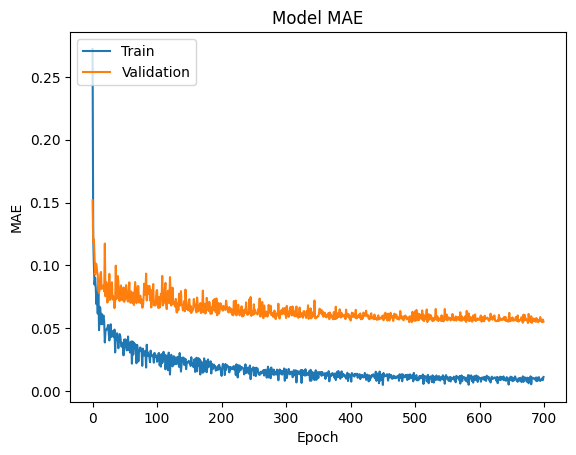

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


5/5 [==============================] - 0s 14ms/step


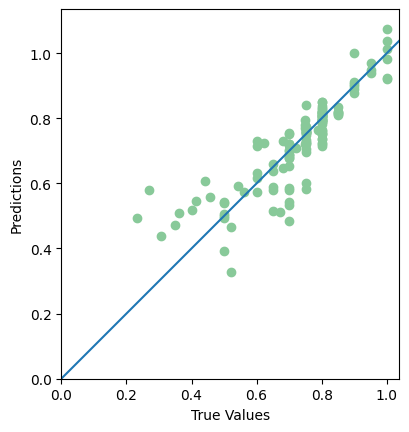

In [ ]:
# Make predictions
predictions = model.predict(X_test).flatten()

# Plotting true labels vs predicted labels
plt.scatter(y_test, predictions, color = '#88c999')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
# plt.legend()
plt.show()

COMPARING ALL MODELS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Load your dataset
# Replace 'your_dataset.csv' with the actual path or URL of your dataset


# Assume the target variable is named 'target'


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Bagging': BaggingRegressor(),
    'Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse


report = pd.DataFrame(results.items(), columns=['Algorithm', 'Mean Squared Error'])
report = report.sort_values(by='Mean Squared Error', ascending=True)
print(report)


           Algorithm  Mean Squared Error
6           Boosting            0.004465
5            Bagging            0.004781
4      Random Forest            0.004983
2  Linear Regression            0.005454
1      Decision Tree            0.007256
0                KNN            0.017908
3                SVM            0.020849
7     Neural Network           17.278628


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
